# TRAVEL INSURANCE PREDICT IMBALANCE CLAIMS STATUS

## BUSSINESS PROBLEM UNDERSTANDING

**CONTEXT**

Sebuah perusahaan dibidang asuransi perjalanan ingin merekrut tim data scientist untuk melakukan analisis terhadap orang-orang yang melakukan registrasi untuk klaim asuransi perjalanan mereka. Perusahaan asuransi perjalanan ini ingin mengetahui kandidat yang benar-benar berhak mendapatkan klaim asuransi, karena jika perusahaan tidak dapat mengetahui kandidat yang benar-benar berhak mendapatkan klaim asuransi atau salah memberikan klaim asuransi kepada orang yang tidak tepat, maka ada kemungkinan perusahaan asuransi perjalanan ini akan mendapatkan kerugian dan juga dapat mengurangi biaya asuransi yang dikeluarkan oleh pihak perusahaan. Informasi terkait data yang dibutuhkan sudah dipegang oleh pihak perusahaan dan diberikan kepada tim data scientist untuk segera dapat di analisis.

**PROBLEM STATEMENT**

Proses pemberian klaim asuransi kepada orang-orang yang berhak mendapatkan maupun yang tidak berhak mendapatkan membutuhkan waktu yang cukup panjang, dan membutuhkan kejelian dalam memberikan keputusan kepada orang-orang yang berhak mendapatkan maupun tidak, jika perusahaan memberikan klaim asuransi kepada orang-orang yang tidak tepat mendapatkan klaim asuransi, maka kemungkinan besar perusahaan asuransi perjalanan ini mendapatkan kerugian biaya pengeluaran yang cukup besar. Dan juga jika diberikan kepada orang-orang yang tepat, maka perusahaan bisa mendapatkan kepuasaan yang baik terhadap pelanggan dan mendapatkan loyalitas dari pelanggan tersebut. Dimana perusahaan bisa mendapatkan keuntungan yang lebih dari pelanggan yang loyal tersebut.

**GOALS**

Maka berdasarkan dari permasalahan tersebut, perusahaan asuransi perjalanan ingin memiliki kemampuan untuk melakukan prediksi kemungkinan orang-orang yang berhak mendapatkan klaim asuransi perjalanan maupun tidak, sehingga perusahaan dapat menghindari kerugian biaya yang besar dari orang yang tidak tepat mendapatkan klaim asuransi perjalanan.

**ANALYTIC APPROACH**

Jadi yang akan tim data scientist lakukan adalah menganalisis data untuk menemukan pola yang tidak seimbang terhadap orang-orang yang tepat atau berhak mendapatkan klaim asuransi maupun yang tidak tepat mendapatkan klaim asuransi.

Kemudian tim data scientist akan membangun model klasifikasi yang akan membantu perusahaan asuransi perjalanan ini untuk dapat memprediksi orang-orang yang berhak mendapatkan klaim asuransi maupun yang tidak mendapatkan klaim asuransi.

**METRIC EVALUATION**

**TARGET**

0 : TIDAK mendapatkan klaim asuransi (claim status = NO)

1 : Mendapatkan klaim asuransi (claim status = YES)

<img src='predval.png'>

**CONFUSSION MATRIX STATEMENT**

* True Positive (TP) : Orang yang secara AKTUAL mendapatkan klaim (1) dan hasil PREDIKSI menunjukan orang itu Mendapatkan klaim (1)
* True Negative (TN) : Orang yang secara AKTUAL TIDAK Mendapatkan klaim (0) dan hasil PREDIKSI menunjukan orang itu TIDAK Mendapatkan klaim (0) 
* False Negative (FN): Orang yang secara AKTUAL Mendapatkan klaim (1) TETAPI, hasil PREDIKSI menunjukan orang itu TIDAK Mendapatkan klaim (0) 
* False Positive (FP): Orang yang secara AKTUAL TIDAK Mendapatkan klaim (0) TETAPI, hasil PREDIKSI menunjukan orang itu Mendapatkan klaim (1)

**CONSEQUENCE**

* FP (type 1 error): Orang yang seharusnya tidak mendapatkan klaim asuransi tetapi prediksi menilai mendapatkan klaim, berpotensi perusahaan akan mendapatkan kerugian pengeluaran untuk klaim asuransi yg seharusnya tidak didapatkan oleh pelanggan.

* FN (type 2 error): Orang yang seharusnya mendapatkan klaim tetapi prediksi menilai TIDAK mendapatkan klaim, berpotensi perusahaan akan kehilangan loyalitas pelanggan, ataupun kehilangan pelanggan potensial.

**METRICS**

Berdasarkan konsekuensi yang sudah di analisa, maka kita harus mengurangi potensi False Positive (FP) yang terjadi, karena perusahaan bisa mendapatkan kerugian yg cukup besar. Maka kita dapat menggunakan metrics F1-Score.

# DATA UNDERSTANDING

Note :
* Dataset tidak seimbang atau imbalanced
* Sebagian fitur adalah kategorikal
* Setiap baris data merepresentasikan informasi orang yang bisa mendapatkan klaim asuransi atau tidak

**ATTRIBUTE INFORMATION**

| Attribute | Data Type, Length | Description |
| --- | --- | --- |
| Agency | Text | Unique ID agen asuransi |
| Agency Type | Text | Nama agen asuransi |
| Distribution Channel | Text | Tipe distribusi agency |
| Product Name | Text | Nama produk asuransi |
| relevent_experience | Text | Relevant experience of candidate |
| Gender | Text | Jenis kelamin pelanggan |
| Duration | Int | Durasi produk asuransi |
| Destination | Text | Tujuan perjalanan |
| Net Sales | Float | Jumlah penjualan asuransi perjalanan |
| Commision (in value) | Float | Komisi yang diterima untuk agen asuransi |
| Age | Int | Usia pelanggan asuransi |
| Claim | Text | Status klaim asuransi |

**IMPORT LIBRARY**

In [6]:
# Dataframe
import numpy as np
import pandas as pd

# visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
from IPython.display import display
import plotly.express as px

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# basic model
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score, cross_validate,RandomizedSearchCV

# ensemble model
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# metrics
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import classification_report, confusion_matrix

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTENC

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")


**IMPORT DATA**

In [7]:
df = pd.read_csv('data_travel_insurance.csv')
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                12681 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB


In [9]:
display(
    df.describe(),
    df.describe(include='object')
)

,Duration,Net Sales,Commision (in value),Age
count,44328.000000,44328.000000,44328.000000,44328.000000
mean,49.424292,40.550948,9.707692,39.925600
std,109.153961,48.661970,19.625637,13.954926
min,-1.000000,-357.500000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.500000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


,Agency,Agency Type,Distribution Channel,Product Name,Gender,Destination,Claim
count,44328,44328,44328,44328,12681,44328,44328
unique,16,2,2,26,2,138,2
top,EPX,Travel Agency,Online,Cancellation Plan,M,SINGAPORE,No
freq,24656,32113,43572,12979,6504,9267,43651


Seperti yang telah kita cek dataset tersebut :
* Ada 44328 baris dari 11 kolom.
* Untuk tipe datanya ada 4 Numerikal dan 7 Kategorikal
* Saat kita cek ada baris yang tidak sama dengan total barisnya, pada kolom gender ternyata 12681 data dari 44328, disini kita akan cek lebih lanjut pada saat data cleaning.
* Penamaan pada kolom ada spasi, yg mungkin bisa menyebabkan kesalahan pada saat kita melakukan proses predict dengan machine learning, maka dari itu kita akan coba cek lebih lanjut pada saat data cleaning.

# DATA CLEANING

Ada data yang hilang/kosong difitur/kolom "Gender", maka kita harus melakukan pengecekan terlebih dahulu di fitur tersebut agar bisa mengambil keputusan apakah kolom tersebut harus digunakan atau bisa saja dihilangkan untuk melakukan analisa lebih lanjut dan juga pembuatan model machine learningnya.

In [10]:
# Cek NULL/NaN didalam dataset

print(df.isnull().sum().any)
print(df.isna().sum()/df.shape[0]*100)

<bound method NDFrame._add_numeric_operations.<locals>.any of Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Gender                  31647
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Age                         0
Claim                       0
dtype: int64>
Agency                   0.000000
Agency Type              0.000000
Distribution Channel     0.000000
Product Name             0.000000
Gender                  71.392799
Duration                 0.000000
Destination              0.000000
Net Sales                0.000000
Commision (in value)     0.000000
Age                      0.000000
Claim                    0.000000
dtype: float64


**Drop kolom gender**

Seperti yang terlihat dari yang ditampilkan dalam pengecekan data yang NULL/NaN, ada sekitar 71% data pada kolom gender NULL/NaN, dan karena data yang tidak ada itu terlalu banyak, dan untuk mengisi data tersebut kita tidak bisa pasti mendapatkan datanya dan jika kita menggunakan predict untuk mengisi data tersebut cukup beresiko dan bisa membuat lebih besar kesalahan pada saat masuk model machine learning.

Maka tim data scientist kita mengambil keputusan untuk menghilangkan kolom Gender, karena data terlalu banyak yang NULL/NaN dan juga dari sisi domain knowledge tidak terlalu signifikan untuk memasukkan gender.

In [11]:
# Drop kolom gender

df.drop(columns=['Gender'], axis=1, inplace=True)
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.0,28,No


In [12]:
df.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Duration', 'Destination', 'Net Sales', 'Commision (in value)', 'Age',
       'Claim'],
      dtype='object')

**Mengganti nama pada kolom**

Pada penamaan kolom terlihat ada beberapa nama kolom yang terpisahkan oleh spasi, disini kita tim data scientist ingin mengganti nama yang terpisahkan oleh spasi untuk menghindari isu penamaan pada saat analisis atau modeling machine learning.

In [13]:
df.rename(
    columns={
        'Agency Type' : 'Agency_Type',
        'Distribution Channel' : 'Dist_Channel',
        'Product Name' : 'Product_Name',
        'Net Sales' : 'Net_Sales',
        'Commision (in value)' : 'Commision'
    }, inplace=True
)
df.head()

,Agency,Agency_Type,Dist_Channel,Product_Name,Duration,Destination,Net_Sales,Commision,Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.0,28,No


**Mengetahui unique values pada dataset**

Untuk mengetahui dalam seleksi fitur apa saja yang akan dipakai pada saat modeling, lebih baik kita mengecek unique values pada dataset.

In [14]:
df.nunique()

Agency            16
Agency_Type        2
Dist_Channel       2
Product_Name      26
Duration         437
Destination      138
Net_Sales       1006
Commision        915
Age               89
Claim              2
dtype: int64

In [15]:
column_keys=df.select_dtypes(include=['object']).columns.tolist()
for key in column_keys:
    print('Unique elements of',key,'are: ')
    print(df[key].unique(),end='\n')
    print(end='\n')

Unique elements of Agency are: 
['C2B' 'EPX' 'JZI' 'CWT' 'LWC' 'ART' 'CSR' 'SSI' 'RAB' 'KML' 'TST' 'TTW'
 'JWT' 'ADM' 'CCR' 'CBH']

Unique elements of Agency_Type are: 
['Airlines' 'Travel Agency']

Unique elements of Dist_Channel are: 
['Online' 'Offline']

Unique elements of Product_Name are: 
['Annual Silver Plan' 'Cancellation Plan' 'Basic Plan'
 '2 way Comprehensive Plan' 'Bronze Plan' '1 way Comprehensive Plan'
 'Rental Vehicle Excess Insurance' 'Single Trip Travel Protect Gold'
 'Silver Plan' 'Value Plan' '24 Protect' 'Annual Travel Protect Gold'
 'Comprehensive Plan' 'Ticket Protector' 'Travel Cruise Protect'
 'Single Trip Travel Protect Silver' 'Individual Comprehensive Plan'
 'Gold Plan' 'Annual Gold Plan' 'Child Comprehensive Plan' 'Premier Plan'
 'Annual Travel Protect Silver' 'Single Trip Travel Protect Platinum'
 'Annual Travel Protect Platinum' 'Spouse or Parents Comprehensive Plan'
 'Travel Cruise Protect Family']

Unique elements of Destination are: 
['SINGAPORE' 'MALA

**Cek Distribusi pada kolom Numerikal**

In [16]:
from pydoc import describe

display(
    df.describe(),
    df.dropna().describe()
)

,Duration,Net_Sales,Commision,Age
count,44328.000000,44328.000000,44328.000000,44328.000000
mean,49.424292,40.550948,9.707692,39.925600
std,109.153961,48.661970,19.625637,13.954926
min,-1.000000,-357.500000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.500000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


,Duration,Net_Sales,Commision,Age
count,44328.000000,44328.000000,44328.000000,44328.000000
mean,49.424292,40.550948,9.707692,39.925600
std,109.153961,48.661970,19.625637,13.954926
min,-1.000000,-357.500000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.500000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


Setelah kita melakukan pengecekan pada distribusi data dari kolom/fitur numerik, data numerikal yang kita punya sama atau tidak ada perubahan apapun setelah data yang kosong dihapus, dimana kita bisa melihat dari mean dan std-nya. 

Jadi kesimpulannya, data numerikal tersebut bisa digunakan dalam analisis dan modelin machine learning kita nanti.

**Cek Distribusi pada kolom Kategorikal**

In [17]:
display(
    df.describe(include=['O']),
    df.dropna().describe(include=['O'])
)

,Agency,Agency_Type,Dist_Channel,Product_Name,Destination,Claim
count,44328,44328,44328,44328,44328,44328
unique,16,2,2,26,138,2
top,EPX,Travel Agency,Online,Cancellation Plan,SINGAPORE,No
freq,24656,32113,43572,12979,9267,43651


,Agency,Agency_Type,Dist_Channel,Product_Name,Destination,Claim
count,44328,44328,44328,44328,44328,44328
unique,16,2,2,26,138,2
top,EPX,Travel Agency,Online,Cancellation Plan,SINGAPORE,No
freq,24656,32113,43572,12979,9267,43651


In [18]:
df.isna().sum()

Agency          0
Agency_Type     0
Dist_Channel    0
Product_Name    0
Duration        0
Destination     0
Net_Sales       0
Commision       0
Age             0
Claim           0
dtype: int64

Setelah kita melakukan pengecekan pada distribusi data dari kolom/fitur Kategorikal, data Kategorikal yang kita punya sama atau tidak ada perubahan apapun setelah data yang kosong dihapus

Jadi kesimpulannya, data Kategorikal tersebut bisa digunakan dalam analisis dan modelin machine learning kita nanti.

dan juga data tidak ada yang NULL maka

**Data yang kita punya sudah bersih, sekarang tim data scientist akan melanjutkan ke tahap analisa data nya untuk keperluan masalah**

# DATA ANALYSIS

**DISTRIBUSI USIA**

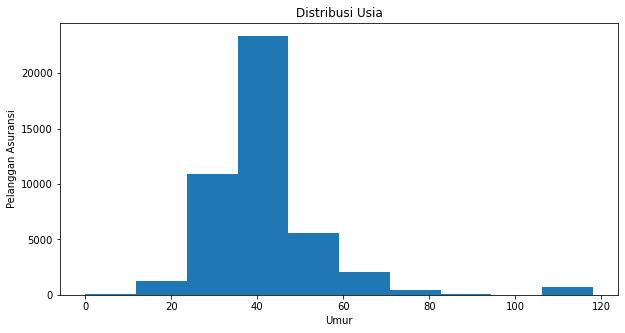

In [19]:
fig = plt.figure(figsize = (10, 5))
plt.hist(df['Age'])
plt.xlabel("Umur")
plt.ylabel("Pelanggan Asuransi")
plt.title("Distribusi Usia")
plt.show()

Seperti yang terlihat pada histogram yang menggambarkan distribusi usia diatas, dari grafik tersebut bisa disimpulkan bahwa mayoritas orang yang memilih untuk menggunakan asuransi perjalanan adalah sekitar umur 35 hingga 50 tahun. Jadi untuk usia bisa kita pertimbangkan di masukan ke dalam fitur untuk modeling machine learning yang akan kita bangun.

**TUJUAN PERJALANAN**

Disini kita ingin melihat data dimana tujuan perjalanan yang paling populer yang menggunakan asuransi perjalanan

In [20]:
df1 = df.groupby(by=["Destination"]).size().reset_index(name="counts")
df1.nlargest(15,['counts'])
df1['DestinationNew'] = np.where(df1['counts']>1000, df1['Destination'], 'Others')
fig = px.pie(df1, values='counts', names='DestinationNew', title='Tujuan perjalanan terpopuler yang menggunakan asuransi perjalanan')
fig.show()

Seperti yang terlihat pada grafik pie chart diatas, tujuan perjalanan yang terpopuler menggunakan asuransi perjalanan adalah ke negara SINGAPORE dengan persentase 20.9%.

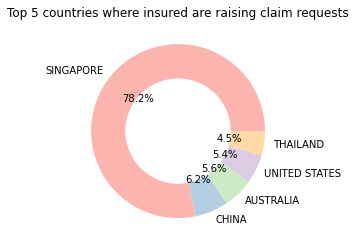

In [21]:
from palettable.colorbrewer.qualitative import Pastel1_7

df4=df.loc[df['Claim']=='Yes']
df5= df4.groupby(by=["Destination"]).size().reset_index(name="counts")
df6=df5.nlargest(5,['counts'])
my_circle = plt.Circle((0, 0), 0.6, color='white')
plt.pie(df6['counts'], labels=df6['Destination'], autopct='%1.1f%%', colors=Pastel1_7.hex_colors)
plt.title('Top 5 countries where insured are raising claim requests')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

Seperti yang kita lihat juga dari grafik diatas untuk 5 negara teratas yang klaimnya disetujui oleh asuransi perjalanan, dan negara Singapore dengan 78,2% menjadi negara paling tinggi dimana asuransi perjalanan menyetujui klaim para pelanggan.

Tujuan perjalanan ini bisa juga dipertimbangkan untuk dimasukkan ke dalam fitur dalam modeling machine learning yang akan kita bangun.

**AGEN ASURANSI**

Kita ingin melihat agen asuransi manakah yang paling banyak digunakan oleh orang-orang untuk menggunakan asuransi perjalanannya.

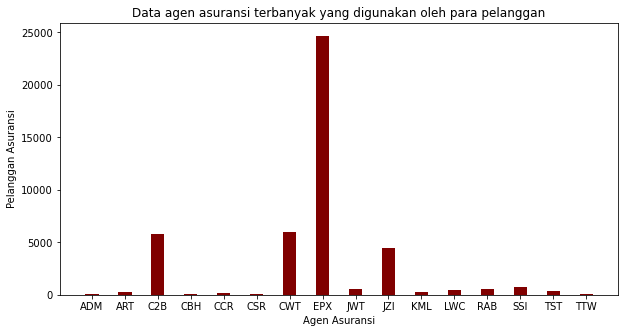

In [22]:
df2 = df.groupby(by=["Agency"]).size().reset_index(name="counts")
fig = plt.figure(figsize = (10, 5))
plt.bar(df2['Agency'], df2['counts'], color ='maroon', width = 0.4)
plt.xlabel("Agen Asuransi")
plt.ylabel("Pelanggan Asuransi")
plt.title("Data agen asuransi terbanyak yang digunakan oleh para pelanggan")
plt.show()

Seperti yang terlihat pada histogram diatas, orang-orang yang menggunakan asuransi perjalanan banyak menggunakan jasa agen asuransi EPX. Data seperti ini bisa kita gunakan sebagai pertimbangan dimasukkan ke dalam fitur dalam modeling machine learning yang akan kita bangun nanti.

**SALURAN DISTRIBUSI**

Kita akan mengecek berapa banyak orang yang melakukan registrasi asuransi perjalanan dari sisi distribusi channel nya apakah pendaftarannya dari online atau offline.

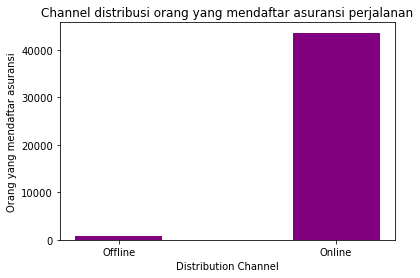

In [23]:
df3 = df.groupby(by=['Dist_Channel']).size().reset_index(name="counts")
plt.bar(df3['Dist_Channel'], df3['counts'], color ='purple',width = 0.4)
plt.xlabel("Distribution Channel")
plt.ylabel("Orang yang mendaftar asuransi")
plt.title("Channel distribusi orang yang mendaftar asuransi perjalanan")
plt.show()

Seperti yang terlihat dari grafik diatas untuk channel distribusi, jadi sebagian besar orang yang mendaftarkan asuransi perjalanannya dengan menggunakan mode online. Disini kita bisa mempertimbangkan untuk kolom distribusi channel untuk dimasukkan kedalam fitur modeling machine learning yang akan kita bangun.

**PRODUK ASURANSI**

Dari tim data scientist ingin melakukan pengecekan dari sisi produk asuransi nya, dimana kita ingin mengecek produk manakah yang paling banyak orang gunakan untuk asuransi perjalanan ini.

In [24]:
df7 = df.groupby(by=["Product_Name"]).size().reset_index(name="counts")
df8 = df.groupby(by=["Product_Name"]).size().reset_index(name="counts")
df8['Product_Name'] = np.where(df7['counts']>500, df7['Product_Name'], 'Others')
fig = px.pie(df8, values='counts', names='Product_Name', title='Produk asuransi yang paling banyak digunakan')
fig.show()

Seperti yang terlihat diatas ini, paling banyak orang di produk cancellation plan.

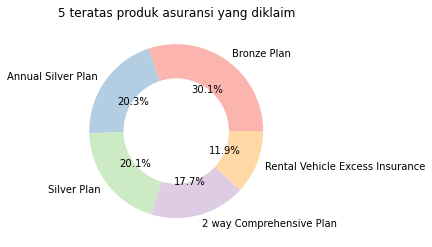

In [25]:
df9 = df4.groupby(by=["Product_Name"]).size().reset_index(name="counts")
df10 = df9.nlargest(5,['counts'])
my_circle = plt.Circle((0, 0), 0.6, color='white')
plt.pie(df10['counts'], labels=df10['Product_Name'], autopct='%1.1f%%',colors=Pastel1_7.hex_colors)
plt.title('5 teratas produk asuransi yang diklaim')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

Seperti yang terlihat dari grafik diatas, bahwa produk asuransi yang paling banyak disetujui klaimnya adalah produk asuransi "Bronze Plan" dengan persentase 30.1% dan kedua yaitu Annual silver plan dengan 20.3%. Dari sini kita bisa mempertimbangkan untuk memasukkan kolom produk kedalam fitur untuk modeling machnine learning yang akan kita bangun nanti.

**JENIS TIPE AGEN**

Tim data scientist ingin melakukan pengecekan terhadap jenis tipe agen

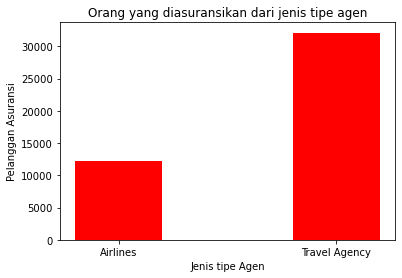

In [26]:
df11=df.groupby(by=['Agency_Type']).size().reset_index(name="counts")
plt.bar(df11['Agency_Type'], df11['counts'], color ='red',width = 0.4)
plt.xlabel("Jenis tipe Agen")
plt.ylabel("Pelanggan Asuransi")
plt.title("Orang yang diasuransikan dari jenis tipe agen")
plt.show()

Seperti yang terlihat dari grafik diatas bahwa paling banyak orang melakukan registrasi asuransi perjalanan yaitu dengan melalui Travel Agency dibandingkan dengan Airlines. Disini kita bisa mempertimbangkan untuk memasukkan kolom Agency_Type ke dalam fitur modeling machine learning yang akan kita bangun nanti.

**KLAIM ASURANSI**

Kita akan melakukan pengecekan data pada klaim asuransi

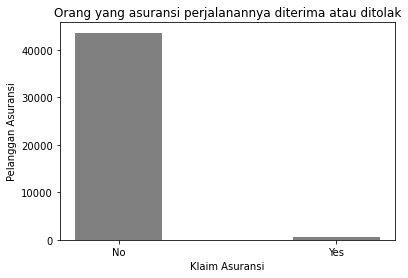

In [27]:
df12 = df.groupby(by=["Claim"]).size().reset_index(name="counts")
plt.bar(df12['Claim'], df12['counts'], color ='grey',width = 0.4)
plt.xlabel("Klaim Asuransi")
plt.ylabel("Pelanggan Asuransi")
plt.title("Orang yang asuransi perjalanannya diterima atau ditolak")
plt.show()

In [28]:
results = df["Claim"].value_counts(dropna=False)
results

No     43651
Yes      677
Name: Claim, dtype: int64

In [29]:
print("Percentage of claims that are Yes: " , results[1]/(results[0] + results[1]))

Percentage of claims that are Yes:  0.01527251398664501


Seperti yang terlihat dari grafik diatas, bahwa orang-orang yang melakukan registrasi asuransi perjalanan lebih banyak ditolak dibandingkan yang diterima, disini terlihat jelas bahwa data klaim tidak seimbang, maka kita bisa memasukkan kolom Claim sebagai target untuk dimasukkan kedalam modeling machine learning yang kan kita bangun nanti, karena kita ingin menyelesaikan masalah ketidakseimbangan data dari kolom klaim.

## CEK DATA NUMERIKAL

Tim data scientist disini akan melakukan pengecekan data numerikal yang akan dipertimbangkan untuk dimasukkan ke dalam modeling machine learning.

In [30]:
df_numerical=df._get_numeric_data()
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Duration   44328 non-null  int64  
 1   Net_Sales  44328 non-null  float64
 2   Commision  44328 non-null  float64
 3   Age        44328 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 1.4 MB


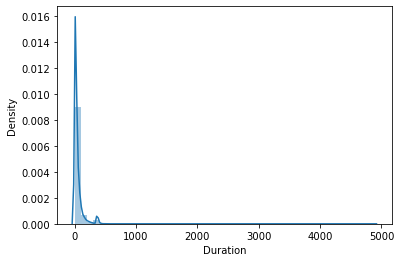

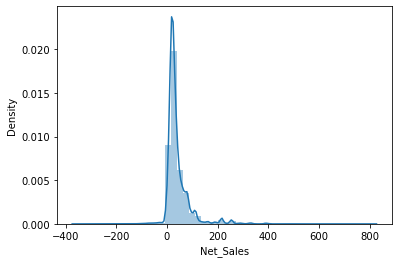

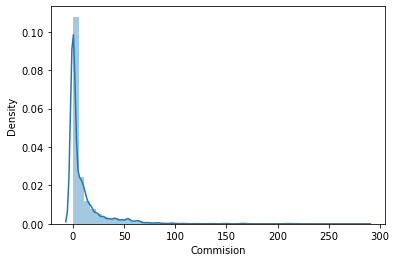

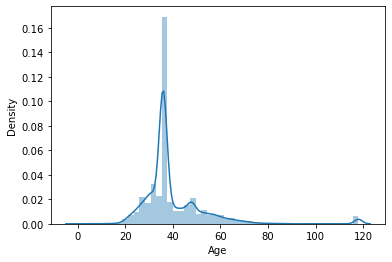

In [31]:
for i, col in enumerate(df_numerical.columns):
    plt.figure(i)
    sns.distplot(df_numerical[col])

Seperti yang terlihat dari grafik data numerikal diatas, dapat kita bisa simpulkan :

* Duration : Data dari kolom ini sangat miring ke kanan atau right skew
* Net_Sales and Comission : Kedua kolom ini sepertinya terkait satu dengan sama lainnya, tapi dari plot grafik menunjukkan perbedaan karena penjualan bersih yang rendah menunjukkan komisi yang tinggi yang dimana secara domain knowledge itu tidak mungkin
* Age : Data dari kolom Age adalah random sehingga distribusinya bisa random 

**CEK KOLOM Duration**

In [32]:
df['Duration'].describe()

count    44328.000000
mean        49.424292
std        109.153961
min         -1.000000
25%          9.000000
50%         22.000000
75%         53.000000
max       4881.000000
Name: Duration, dtype: float64

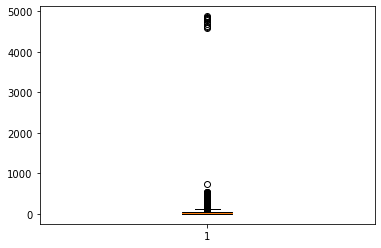

In [33]:
fig = plt.figure(figsize =(6,4 ))
plt.boxplot(df['Duration'])
plt.show()

Bisa kita lihat dari data diatas bahwa kolom duration ada outliers dan minimal angkanya menunjukan minus, seperti yang kita tahu bahwa tidak mungkin penunjukan durasi/waktu itu minus, maka disini tim data scientist harus melakukan normalisasi terhadap kolom durasi dengan menghilangkan data yang minus.

In [34]:
df13=df['Duration']<0
df13.sum()

2

Kita cek bahwa ada 2 data dari duration yang mempunyai values minus, maka kita akan mengganti 2 data duration tersebut dengan rata-rata values dari kolom duration.

In [35]:
df.loc[df['Duration'] < 0, 'Duration'] = 49.424
df['Duration'].describe()

count    44328.000000
mean        49.426567
std        109.153436
min          0.000000
25%          9.000000
50%         22.000000
75%         53.000000
max       4881.000000
Name: Duration, dtype: float64

**CEK KOLOM Net_Sales dan Comission**

Pada kolom Net_Sales dan kolom Comission memiliki keanehan yaitu, net sales memiliki value yang rendah dibandingkan comission, dari domain knowledge yang kita ketahui tidak mungkin sepertinya netsales yang rendah mempunyai tingkat komisi yang tinggi.

ref : https://www.academia.edu/26124725/Impact_of_sales_commission_to_the_total_sales_revenue_of_an_organisation

Maka dari itu kita harus normalisasi terlebih dahulu data netsales dan comission dengan membuat data tersebut setara, agar pada saat modeling meminimalisir kesalahan predict dalam machine learning.

In [36]:
df14= df['Net_Sales']<df['Commision']
df14.sum()

1410

In [37]:
df.loc[df['Net_Sales'] == 0.0, 'Commision'] = 0

Disini kita sudah membuat data setara jika net sales 0 maka semua value comission 0.

### CEK KORELASI

kita akan melakukan pengecekan korelasi antar kolom yang bersangkutan untuk dipertimbangkan dalam fitur yang akan dimasukkan kedalam machine learning nantinya.

<AxesSubplot:>

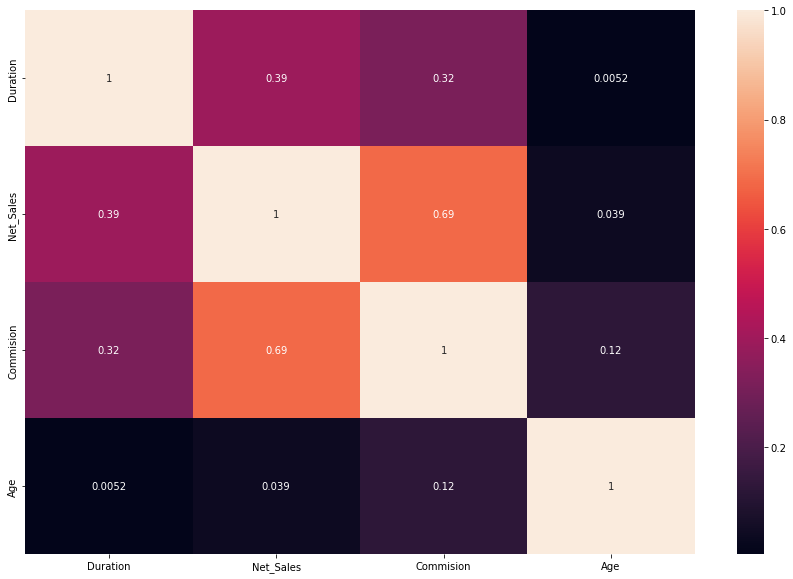

In [38]:
# correlation heat map numerical columns

fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, ax=ax)

Seperti yang kita lihat dari correlation heatmap antara kolom numerikal diatas, bahwa tidak ada korelasi yang tinggi antar kolom, maka kita bisa gunakan semua kolom numerikal untuk dimasukkan kedalam fitur machine learning yang akan kita bangun nanti.

In [39]:
# correlation heatmap categorical columns

import scipy.stats as ss

def corr_cat(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

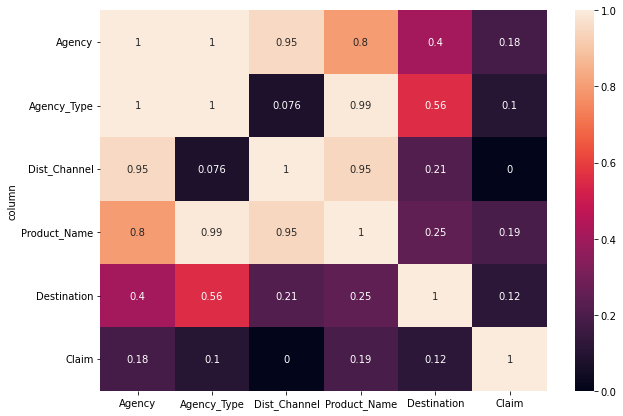

In [40]:
categorical=['Agency', 'Agency_Type', 'Dist_Channel', 'Product_Name',  'Destination', 'Claim']
corr_cat_v=pd.DataFrame({i:[corr_cat(df[i],df[j]) for j in categorical] for i in categorical})
corr_cat_v['column']=[i for i in categorical if i not in ['memberid']]
corr_cat_v.set_index('column',inplace=True)

plt.figure(figsize=(10,7))
sns.heatmap(corr_cat_v,annot=True)
plt.show()

seperti yang kita lihat dari korelasi antara kolom kategorikal, bisa dilihat bahwa kolom agency_type mempunyai korelasi yang kuat antar kolom agency dan product_name. Maka dari itu kita bisa mempertimbangkan untuk melakukan drop table agency_type atau tidak menggunakan kolom agency_type agar bisa melakukan prediksi pada machine learning lebih optimal.

**PREDIKSI FITUR YANG AKAN DIGUNAKAN**

Disini kita akan mencoba memasukkan data yang akan kita ingin gunakan kedalam fitur untuk membuat machine learningnya, kita akan mencoba memakai fungsi Chi Square test untuk melakukan prediksi fitur yang akan kita gunakan.

In [41]:
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, df):
        self.df = df
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} PENTING dimasukkan kedalam FITUR.".format(colX)
        else:
            result="{0} TIDAK PENTING dimasukkan kedalam FITUR. (hilangkan {0})".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = ss.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)

In [42]:
X = df.drop(['Claim'], axis=1)
ct = ChiSquare(df)
for c in X.columns:
    ct.TestIndependence(c, 'Claim')

Agency PENTING dimasukkan kedalam FITUR.
Agency_Type PENTING dimasukkan kedalam FITUR.
Dist_Channel TIDAK PENTING dimasukkan kedalam FITUR. (hilangkan Dist_Channel)
Product_Name PENTING dimasukkan kedalam FITUR.
Duration PENTING dimasukkan kedalam FITUR.
Destination PENTING dimasukkan kedalam FITUR.
Net_Sales PENTING dimasukkan kedalam FITUR.
Commision PENTING dimasukkan kedalam FITUR.
Age PENTING dimasukkan kedalam FITUR.


Dilihat dari fungsi yang kita gunakan untuk mengecek fitur apa saja yang akan kita gunakan untuk dimasukkan ke dalam machine learning, bahwa kolom dist_channel TIDAK PENTING untuk dimasukkan kedalam fitur model machine learning. Dan juga sebelumnya kolom agency_type mempunyai korelasi yang tinggi terhadap kolom agency dan product_name maka kita bisa hilangkan juga kolom tersebut. 

**DROP KOLOM Dist_Channel dan Agency_Type**

In [43]:
df.drop(columns=['Dist_Channel','Agency_Type'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Agency        44328 non-null  object 
 1   Product_Name  44328 non-null  object 
 2   Duration      44328 non-null  float64
 3   Destination   44328 non-null  object 
 4   Net_Sales     44328 non-null  float64
 5   Commision     44328 non-null  float64
 6   Age           44328 non-null  int64  
 7   Claim         44328 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 2.7+ MB


**RENAME VALUE**

Setelah kita cek datanya, banyak data counts dari kolom Destination yang hanya mempunyai 1 saja, jadi disini kita akan kelompokkan data yang hanya mempunyai 1 value, menjadi 'OTHER'. Agar pada saat dimasukkan kedalam machine learning tidak terjadi anomali data.

In [44]:
df['Destination'].value_counts().loc[lambda x: x<=1]

TAJIKISTAN                                1
SENEGAL                                   1
CAMEROON                                  1
TIBET                                     1
SAMOA                                     1
URUGUAY                                   1
GUINEA-BISSAU                             1
KOREA, DEMOCRATIC PEOPLE'S REPUBLIC OF    1
FAROE ISLANDS                             1
DOMINICAN REPUBLIC                        1
MOLDOVA, REPUBLIC OF                      1
BENIN                                     1
ARMENIA                                   1
GUYANA                                    1
CAYMAN ISLANDS                            1
BOTSWANA                                  1
RWANDA                                    1
TURKMENISTAN                              1
GUADELOUPE                                1
REPUBLIC OF MONTENEGRO                    1
IRAN, ISLAMIC REPUBLIC OF                 1
LATVIA                                    1
JAMAICA                         

In [45]:
# mengganti nama yang mempunyai 1 frekuensi menjadi other agar tidak terjadi anomali data

df['Destination'] = df['Destination'].replace(['CAMEROON','MOLDOVA, REPUBLIC OF','DOMINICAN REPUBLIC',
'FAROE ISLANDS',"KOREA, DEMOCRATIC PEOPLE'S REPUBLIC OF",'ARMENIA','TAJIKISTAN','SAMOA','TIBET',
'GUINEA-BISSAU','SENEGAL','URUGUAY','GUYANA','BOTSWANA','RWANDA','GUADELOUPE','REPUBLIC OF MONTENEGRO',
'IRAN, ISLAMIC REPUBLIC OF','CAYMAN ISLANDS','BENIN','MACEDONIA, THE FORMER YUGOSLAV REPUBLIC OF',
'TRINIDAD AND TOBAGO', 'MALI','ANGOLA','LATVIA','JAMAICA','FRENCH POLYNESIA','TURKMENISTAN',
'NIGERIA','REUNION','ZAMBIA','UGANDA','PANAMA', 'LITHUANIA','NAMIBIA'], 'OTHER')

In [46]:
df['Destination'].value_counts().loc[lambda x: x<=1]

Series([], Name: Destination, dtype: int64)

In [47]:
df['Destination'].value_counts()['OTHER']

45

In [48]:
# Dikarenakan 'Travel Cruise Protect Family' memiliki frekuensi 1,
# yang dapat menyebabkan error pada saat splitting data.
# Maka row tersebut akan di drop

index_p = df[df['Product_Name']=='Travel Cruise Protect Family'].index[0]
df.drop(index=index_p, inplace=True)

# DATA PREPARATION

In [49]:
column_names = ["Agency","Product_Name","Destination","Duration", "Net_Sales","Commision",'Age',"Claim"]
df = df.reindex(columns=column_names)
df.head()

,Agency,Product_Name,Destination,Duration,Net_Sales,Commision,Age,Claim
0,C2B,Annual Silver Plan,SINGAPORE,365.0,216.0,54.0,57,No
1,EPX,Cancellation Plan,MALAYSIA,4.0,10.0,0.0,33,No
2,JZI,Basic Plan,INDIA,19.0,22.0,7.7,26,No
3,EPX,2 way Comprehensive Plan,UNITED STATES,20.0,112.0,0.0,59,No
4,C2B,Bronze Plan,SINGAPORE,8.0,16.0,4.0,28,No


**KESIMPULAN DATA**

Dari yang telah kita pelajari dari data yang kita analisis sebelumnya :

* Berdasarkan penjelasan yang telah diberikan pada bagian ***BusinessUnderstanding - Confussion Matrix*** Dari kasus yang kita hadapi yaitu ketidakseimbangan data pada Claim, Metric yang menjadi perhatian utama adalah adalah *F1-Score*.

* Berdasarkan pada proses *data cleaning* dan *data analysis* yang telah kita lakukan pada tahapan sebelumnya. Fitur data telah selesai kita kurasi untuk dimasukkan kedalam modeling machine learning.

* Data pada kolom Agency_Type TIDAK kita masukkan kedalam fitur, karena data tersebut terlalu tinggi korelasinya terhadap kolom Agency dan Product_Name, dan sudah kita lakukan drop data pada saat proses data analysis.

* Data pada kolom Dist_Channel TIDAK kita masukkan kedalam fitur, karena pada saat analysis data menggunakan fungsi Chi-Square Test data tersebut tidak direkomendasikan untuk dimasukkan kedalam fitur modeling machnine learning, dan data tersebut sudah kita drop pada saat proses data analysis.

* Data yang sudah dikurasi kita susun kolomnya sedemikian rupa untuk memudahkan pengolahan data.

* Jumlah kolom kategorikal dari fitur yang ada tidak terlalu banyak, maka pada saat encoding data kita cukup menggunakan *OneHotEncoding*.

* Data yang sudah dikurasi tidak ada outliers, maka kita akan menggunakan *MinMaxScaller* untuk scalling data tersebut.

* Data pada kolom *Claim* adalah Imbalance, maka kita perlu melakukan Handling Imbalance dengan menggunakan *SMOTE*.

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44327 entries, 0 to 44327
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Agency        44327 non-null  object 
 1   Product_Name  44327 non-null  object 
 2   Destination   44327 non-null  object 
 3   Duration      44327 non-null  float64
 4   Net_Sales     44327 non-null  float64
 5   Commision     44327 non-null  float64
 6   Age           44327 non-null  int64  
 7   Claim         44327 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 3.0+ MB


**ENCODING DATA**

In [51]:
# fitur and target

X = df[['Agency','Product_Name','Destination','Duration','Net_Sales','Commision','Age']]
y = df['Claim']
y = pd.Series(np.where(y=='Yes', 1, 0))

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)

In [52]:
# Base models
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=42)

# Ensemble yang digunakan untuk base model
bag = BaggingClassifier(random_state=42)
forest = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state = 42)

# List nama model dan juga algoritma nya
models = [knn, dt, bag, forest, xgb]
model_name = ['K Neighbors Classifier', 'Decision Tree Classifier', 'Bagging Classifier', 'Random Forest Classifier',
'XGB Classifier']

In [53]:
# Encoding dan Scaling menggunakan transformer
transformer = ColumnTransformer([
    ('Encoding', OneHotEncoder(drop='first') ,['Agency', 'Product_Name', 'Destination']),
    ('Scaling', MinMaxScaler() ,['Duration', 'Net_Sales','Commision','Age']),
], remainder='passthrough')

# MODELING AND EVALUATION

**Cross Validation**

Pada proses didalam modeling, kita akan mencari model terbaik dalam memprediksi data yang diolah menggunakan metode Cross Validation.

Proses ini dibagi menjadi 2 yaitu:  
- Cross validation untuk mengetahui model mana yang memiliki performa terbaik pada train set
- Permodelan untuk mengetahui model mana yang memiliki performa terbaik pada test set

Base model ini digunakan sebagai model awal, tidak menutup kemungkinan sebagai base model untuk ensemble agar hasil prediksi lebih baik.

In [54]:
# Cross Validation pada data train

f1_mean = []
f1_std = []

for i in models:
    # mendefinisikan pipeline
    pipe_model = Pipeline(
        [('transformer', transformer),
        ('model', i)])

    # Cross Validation menggunakan metrics 'recall' dan cv=5
    crossval = cross_val_score(
        estimator=pipe_model,
        X=X_train,
        y=y_train,
        scoring='f1',
        cv=5,
        error_score="raise"
    )
    f1_mean.append(crossval.mean()*100)
    f1_std.append(crossval.std()*100)

# Rata - rata hasil dan standard deviasinya disimpan ke dalam DataFrame
model_df = pd.DataFrame({
    'model':model_name,
    'basic f1 mean':f1_mean,
    'basic f1 std':f1_std,
})

model_df

KeyboardInterrupt: 

**Cross Validation Score**

Disini kita tidak menggunakan logistic regression, ridge, gradient, dan adaboost dikarenakan pada hasil proses cross validation score menunjukan 0.00, jd pertimbangan kita adalah tidak menggunakan keempat model tersebut

- Hasil prediksi dan standard deviasi pada setiap model tidak terlalu berbeda, kecuali pada model Decision Tree.
- Decision Tree Classifier sebagai model dengan nilai tertinggi.
- XGB Classifier memiliki hasil paling rendah.

Analisa akan dilanjutkan dengan prediksi terhadap data test

In [ ]:
# menampung data
test_f1_score = []

for modelname, model in zip(model_name, models):
    
    # Mendefinisikan Pipemodel
    model_pipe = Pipeline([                 
        ("preprocessing",transformer),
        ("model", model)
        ])
    
    model_pipe.fit(X_train, y_train)                                # training model pada data train
    Y_pred_class_ = model_pipe.predict(X_test)                      # Prediksi pada data test

    # hasil scoring disimpan
    test_f1_score.append([f1_score(y_test, Y_pred_class_)])

# hasil scoring dibuat dalam dataframe
df_test_f1score = pd.DataFrame(test_f1_score, index = model_name, columns = ["test f1 score"])
model_df = model_df.join(df_test_f1score,on='model', how='outer')
model_df

,model,basic f1 mean,basic f1 std,test f1 score
0,K Neighbors Classifier,1.406777,1.305722,0.000000
1,Decision Tree Classifier,6.161661,2.892987,0.065455
2,Bagging Classifier,1.736536,1.383522,0.023392
3,Random Forest Classifier,1.259921,1.543161,0.024845
4,XGB Classifier,0.701754,1.403509,0.028571


**Score Train & Test**  

- Hasil prediksi paling tinggi baik ditunjukan oleh `Decision Tree Classifier`
- Hasil yang paling stabil ditunjukan oleh `Random Forest Classifier`

Dalam rangka memaksimalkan hasil prediksi, maka data yang ada akan di balancing kembali menggunakan undersampling dan oversampling.

### UNDERSAMPLING

Pada proses ini data akan diundersampling agar bisa mendapatkan prediksi yang lebih baik, karena data imbalance.

In [ ]:
transformer = ColumnTransformer([
    ('Encoding', OneHotEncoder(handle_unknown = 'ignore') ,['Agency', 'Product_Name', 'Destination']),
    ('Scaling', MinMaxScaler() ,['Duration', 'Net_Sales','Commision','Age']),
], remainder='passthrough')

In [ ]:
rus = RandomUnderSampler(random_state=2)

# Cross Validation pada data train
rus_f1_mean = []
rus_f1_std = []

for i in models:
    # Mendefinisikan pipeline
    pipe_model = Pipeline([
        ('resampling', rus),
        ('transformer', transformer),
        ('model', i)
        ])

    # Cross Validation menggunakan metrics 'recall' dan cv=5
    crossval = cross_val_score(
        estimator=pipe_model,
        X=X_train,
        y=y_train,
        scoring='f1',
        cv=5,
        error_score="raise"
    )
    rus_f1_mean.append(crossval.mean()*100)
    rus_f1_std.append(crossval.std()*100)

# Rata - rata hasil dan standard deviasinya disimpan ke dalam DataFrame
rus_model_df = pd.DataFrame({
    'model':model_name,
    'undersampling F1 mean':rus_f1_mean,
    'undersampling F1 std':rus_f1_std,
})

rus_model_df

,model,undersampling F1 mean,undersampling F1 std
0,K Neighbors Classifier,7.582597,0.825628
1,Decision Tree Classifier,5.620824,0.349229
2,Bagging Classifier,7.735425,0.473623
3,Random Forest Classifier,8.026328,0.610327
4,XGB Classifier,7.190960,0.381875


**Undersampling Score**

- Hasil prediksi paling tinggi dihasilkan oleh `Random Forest Classifier`
- Hasil prediksi naik dibandingkan data yang tidak di under sampling

Analisa akan dilanjutkan dengan prediksi terhadap data test

In [ ]:
# buat list untuk menampung hasil test base model
rustest_f1_score = []

for modelname, model in zip(model_name, models):
    
    # mendefinsikan pipemodel
    model_pipe = Pipeline([
        ('resampling', rus),
        ('transformer', transformer),
        ('model', model)
        ])
    
    model_pipe.fit(X_train, y_train)                    # training model pada data train
    Y_pred_class_ = model_pipe.predict(X_test)          # predict class
    
    # hasil scoring disimpan dalam sebuah list
    rustest_f1_score.append([recall_score(y_test, Y_pred_class_)])
    

# hasil scoring dibuat dalam bentuk dataframe
df_rustest_f1score = pd.DataFrame(rustest_f1_score, index = model_name, columns = ["rus test f1 score"] )
rus_model_df = rus_model_df.join(df_test_f1score,on='model', how='outer')
rus_model_df

,model,undersampling F1 mean,undersampling F1 std,test f1 score
0,K Neighbors Classifier,7.582597,0.825628,0.000000
1,Decision Tree Classifier,5.620824,0.349229,0.065455
2,Bagging Classifier,7.735425,0.473623,0.023392
3,Random Forest Classifier,8.026328,0.610327,0.024845
4,XGB Classifier,7.190960,0.381875,0.028571


**Train & Test score pada data Undersampling**

- Hasil prediksi data Test cenderung lebih rendah dibandingkan data Train pada semua model, yang menandakan bahwa model cenderung underfitting
- Hasil permodelan `Random Forest Classifier` sangat underfitting

### OVERSAMPLING

Pada proses ini data akan dioversampling agar bisa mendapatkan prediksi yang lebih baik, karena data imbalance.

In [ ]:
df.head()

,Agency,Product_Name,Destination,Duration,Net_Sales,Commision,Age,Claim
0,C2B,Annual Silver Plan,SINGAPORE,365.0,216.0,54.0,57,No
1,EPX,Cancellation Plan,MALAYSIA,4.0,10.0,0.0,33,No
2,JZI,Basic Plan,INDIA,19.0,22.0,7.7,26,No
3,EPX,2 way Comprehensive Plan,UNITED STATES,20.0,112.0,0.0,59,No
4,C2B,Bronze Plan,SINGAPORE,8.0,16.0,4.0,28,No


In [ ]:
cat_col = [0,1,2]

transformer = ColumnTransformer([
    ('Encoding', OneHotEncoder(handle_unknown = 'ignore') ,['Agency', 'Product_Name', 'Destination']),
    ('Scaling', MinMaxScaler() ,['Duration', 'Net_Sales','Commision','Age']),
], remainder='passthrough')

In [ ]:
smote_nc = SMOTENC(categorical_features = cat_col, random_state = 0)

# Cross Validation pada data train
over_f1_mean = []
over_f1_std = []

for i in models:
    # Mendefinisikan pipeline
    pipe_model = Pipeline([
        ('resampling', smote_nc),
        ('transformer', transformer),
        ('model', i)
        ])

    # Cross Validation menggunakan metrics 'recall' dan cv=5
    crossval = cross_val_score(
        estimator=pipe_model,
        X=X_train,
        y=y_train,
        scoring='f1',
        cv=5
    )
    over_f1_mean.append(crossval.mean()*100)
    over_f1_std.append(crossval.std()*100)

# Rata - rata hasil dan standard deviasinya disimpan ke dalam DataFrame
sm_model_df = pd.DataFrame({
    'model':model_name,
    'oversampling F! mean':over_f1_mean,
    'oversampling F1 std':over_f1_std,
})

sm_model_df

,model,oversampling F! mean,oversampling F1 std
0,K Neighbors Classifier,8.832386,0.474150
1,Decision Tree Classifier,6.576222,1.508586
2,Bagging Classifier,7.500213,1.672580
3,Random Forest Classifier,9.736197,1.767443
4,XGB Classifier,11.653883,1.592058


**Oversampling Score**

- Hasil prediksi paling tinggi dihasilkan oleh `XGB Classifier`
- Hasil prediksi naik dibandingkan data yang tidak di under sampling

Analisa akan dilanjutkan dengan prediksi terhadap data test

In [ ]:
# buat list untuk menampung hasil test base model
smtest_f1_score = []

for modelname, model in zip(model_name, models):
    
    # mendefinsikan pipemodel
    model_pipe = Pipeline([
        ('resampling', smote_nc),
        ('transformer', transformer),
        ('model', model)
        ])
    
    model_pipe.fit(X_train, y_train)            # training model pada data train 
    Y_pred_class_ = model_pipe.predict(X_test)  # predict class
    
    # hasil scoring disimpan dalam sebuah list
    smtest_f1_score.append([f1_score(y_test, Y_pred_class_)])
    
# hasil scoring dibuat dalam bentuk dataframe
df_smtest_f1score = pd.DataFrame(smtest_f1_score, index = model_name, columns = ["Over test F1 score"])
sm_model_df = sm_model_df.join(df_test_f1score,on='model', how='outer')
sm_model_df

,model,oversampling F! mean,oversampling F1 std,test f1 score
0,K Neighbors Classifier,8.832386,0.474150,0.000000
1,Decision Tree Classifier,6.576222,1.508586,0.065455
2,Bagging Classifier,7.500213,1.672580,0.023392
3,Random Forest Classifier,9.736197,1.767443,0.024845
4,XGB Classifier,11.653883,1.592058,0.028571


**Train & Test pada data Oversampling**

- Hasil prediksi data Test cenderung lebih rendah dibandingkan data Train pada semua model, yang menandakan bahwa model cenderung overfitting
- Hasil permodelan `XGB Classifier` sangat overfitting

### KESIMPULAN MODEL



In [ ]:
f1_score_list = pd.merge(pd.merge(model_df,rus_model_df, on='model'),sm_model_df, on= 'model')
f1_score_list.sort_values('basic f1 mean', ascending=False)

,model,basic f1 mean,basic f1 std,test f1 score_x,undersampling F1 mean,undersampling F1 std,test f1 score_y,oversampling F! mean,oversampling F1 std,test f1 score
1,Decision Tree Classifier,6.161661,2.892987,0.065455,5.620824,0.349229,0.065455,6.576222,1.508586,0.065455
2,Bagging Classifier,1.736536,1.383522,0.023392,7.735425,0.473623,0.023392,7.500213,1.672580,0.023392
0,K Neighbors Classifier,1.406777,1.305722,0.000000,7.582597,0.825628,0.000000,8.832386,0.474150,0.000000
3,Random Forest Classifier,1.259921,1.543161,0.024845,8.026328,0.610327,0.024845,9.736197,1.767443,0.024845
4,XGB Classifier,0.701754,1.403509,0.028571,7.190960,0.381875,0.028571,11.653883,1.592058,0.028571


Kesimpulan dari modeling data

* Seperti pada DataFrame diatas, dapat dilihat bahwa data yang telah di resampling memiliki kecenderungan overfitting pada semua model

* Basic model yang memiliki nilai bagus adalah `Decision Tree Classifier`, `Bagging Classifier`, dan `Random Forest Classifier`

# HYPERPARAMETER TUNING

Setelah kita melakukan cross validation pada data yang kita modeling sebelumnya, hasil model yang paling baik yang didapatkan dari proses diatas adalah `Decision Tree Classifier`, `Bagging Classifier`, dan `Random Forest Classifier`. Jadi pada proses berikutnya kita akan melakukan Hyperparameter tuning pada model tersebut, tetapi antara model decision tree dan bagging bisa dibilang mirip maka kita akan menghilang Bagging classifier untuk tidak hypertuning.

Jadi kita akan melakukan Hyperparameter tuning dengan model `Decision Tree Classifier` dan `Random Forest Classifier`.

**Hyperparameter Tuning pada Decision Tree Classifier**
>
>Hyperparameter tuning is searching the hyperparameter space for a set of values that will optimize your model architecture.
>

Hyperparameter Tuning Decision Tree
Pada hyperparameter tuning Decision Tree ini, kita menggunakan Randomized Search, dengan n_iter = 500 dan cv = 5.

Source :

* https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680

* https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [ ]:
cat_col = [0,1,2]

# def transformer
transformer = ColumnTransformer([
    ('Encoding', OneHotEncoder(handle_unknown = 'ignore') ,['Agency', 'Product_Name', 'Destination']),
    ('Scaling', MinMaxScaler() ,['Duration', 'Net_Sales','Commision','Age']),
], remainder='passthrough')

In [ ]:
# Mendefinisikan kembali pipeline
dt_pipe = Pipeline(
        [('transformer', transformer),
        ('model', dt)])

# membuat hyperparameter space Decision Tree
dt_paramspace = {
    "model__criterion" : ['gini','entropy','log_loss'],
    "model__max_depth" : range(1,101), 
    "model__min_samples_split" : range(2,41), 
    "model__min_samples_leaf" : range(1,21), 
    "model__max_features" : ["sqrt", "log2", None],
    "model__class_weight" : ["balanced", None]
}

dt_randomsearch = RandomizedSearchCV(
    estimator=dt_pipe,
    param_distributions=dt_paramspace,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    random_state=0,
    n_iter=500)

# Training Random Search CV Random Forest Classifier
dt_randomsearch.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('Encoding',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['Agency',
                                                                                'Product_Name',
                                                                                'Destination']),
                                                                              ('Scaling',
                                                                               MinMaxScaler(),
                                                                               ['Duration',
                                                       

In [ ]:
print("Best parameter : ", dt_randomsearch.best_params_, "\n")
print("best score : ", dt_randomsearch.best_score_)

Best parameter :  {'model__min_samples_split': 38, 'model__min_samples_leaf': 9, 'model__max_features': 'sqrt', 'model__max_depth': 3, 'model__criterion': 'gini', 'model__class_weight': 'balanced'} 

best score :  0.1370267542455612


Hasil dari best score untuk hyperparameter tuning decision tree classifier adalah 0.13

In [ ]:
# model default sebelum hyperparameter tuning
dt_pipe

# mendapatkan model GradientBoost dengan parameter terbaik (gridsearch)
dt_bestmodel = dt_randomsearch.best_estimator_

# training model default 
dt_pipe.fit(X_train, y_train)

# training dt tuned 
dt_bestmodel.fit(X_train, y_train)

# mendapatkan hasil prediksi GradientBoost default
Y_pred_class_dt_default = dt_pipe.predict(X_test)

# mendapatkan hasil prediksi dt tuned
Y_pred_class_dt_tuned = dt_bestmodel.predict(X_test)

# keluarkan recall untuk Decision Tree Default dan Tuned
print("F1 score dt default : ", f1_score(y_test, Y_pred_class_dt_default))
print("F1 score dt tuned : ", f1_score(y_test, Y_pred_class_dt_tuned), "\n")


F1 score dt default :  0.06521739130434781
F1 score dt tuned :  0.10942249240121582 



Terlihat bahwa model DecisionTree setelah kita tuning hyperparameternya memiliki nilai yang lebih baik.

**Hyperparameter Tuning pada Random Forest Classifier**

>
>Random Forest comes with a caveat – the numerous hyperparameters that can make fresher data scientists weak in the knees. But don’t worry! In this article, we will be looking at the various Random Forest hyperparameters and understand how to tune and optimize them.
>

Pada hyperparameter tuning Random Forest Classifier ini, dinggunakan Randomized Search, dengan n_iter = 100 dan cv = 5.

Source:
* https://www.analyticsvidhya.com/blog/2020/03/beginners-guide-random-forest-hyperparameter-tuning/
* https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [ ]:
rf_pipe = Pipeline(
        [('transformer', transformer),
        ('model', forest)])

# membuat hyperparameter space Random Forest Classifier
rf_paramspace = {
    "model__n_estimators" : [5,10,100, 200, 500, 1000], 
    "model__max_depth" : range(1,101), 
    "model__min_samples_split" : range(2,41), 
    "model__min_samples_leaf" : range(1,21), 
    "model__max_features" : ["sqrt", "log2", None, 5],
    "model__class_weight" : ["balanced", "balanced_subsample", None]
}

rf_randomsearch = RandomizedSearchCV(
    estimator=rf_pipe,
    param_distributions=rf_paramspace,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    random_state=0,
    n_iter=50)

# Training Random Search CV Random Forest Classifier
rf_randomsearch.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('Encoding',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['Agency',
                                                                                'Product_Name',
                                                                                'Destination']),
                                                                              ('Scaling',
                                                                               MinMaxScaler(),
                                                                               ['Duration',
                                                       

In [ ]:
print("Best parameter : ", rf_randomsearch.best_params_, "\n")
print("best score : ", rf_randomsearch.best_score_)

Best parameter :  {'model__n_estimators': 100, 'model__min_samples_split': 4, 'model__min_samples_leaf': 6, 'model__max_features': 5, 'model__max_depth': 76, 'model__class_weight': 'balanced'} 

best score :  0.15211276801288542


In [ ]:
# model default sebelum hyperparameter tuning
rf_pipe

# mendapatkan model GradientBoost dengan parameter terbaik (gridsearch)
rf_bestmodel = rf_randomsearch.best_estimator_

# training model default 
rf_pipe.fit(X_train, y_train)

# training RF tuned 
rf_bestmodel.fit(X_train, y_train)

# mendapatkan hasil prediksi GradientBoost default
Y_pred_class_rf_default = rf_pipe.predict(X_test)

# mendapatkan hasil prediksi RF tuned
Y_pred_class_rf_tuned = rf_bestmodel.predict(X_test)

# keluarkan recall untuk GradientBoost Default dan Tuned
print("F1 score RF default : ", f1_score(y_test, Y_pred_class_rf_default))
print("F1 score RF tuned : ", f1_score(y_test, Y_pred_class_rf_tuned), "\n")

F1 score RF default :  0.012578616352201257
F1 score RF tuned :  0.12202380952380953 



**KESIMPULAN HYPERPARAMETER TUNING**

**Decision Tree**  

F1 score dt default :  0.06521739130434781  

F1 score dt tuned :  0.10942249240121582   

*Best parameter*

'model__min_samples_split': 38

'model__min_samples_leaf': 9

'model__max_features': 'sqrt'

'model__max_depth': 3

'model__criterion': 'gini'

'model__class_weight': 'balanced'


**Random Forest Classifier**  

F1 score RF default :  0.012578616352201257 

F1 score RF tuned :  0.12202380952380953  

*Best parameter*

'model__n_estimators': 100

'model__min_samples_split': 4

'model__min_samples_leaf': 6

'model__max_features': 5

'model__max_depth': 76

'model__class_weight': 'balanced'


* Dari Hasil Hyperparameter tuning yang didapatkan, ternyata `Decision Tree` memiliki nilai paling baik dibandingkan model lainnya
* Bila diperhatikan, best parameter Decision Tree memiliki Max Depth = 3, yang artinya kedalam `Decision Tree` sangat pendek
* Dapat diartikan bahwa untuk dataset ini, hanya diperlukan model yang sederhana saja

# FEATURE IMPORTANCE

In [ ]:
# mendapatkan feature names
feature_names = list(transformer.transformers_[0][1].get_feature_names_out()) + list(transformer.transformers_[1][1].get_feature_names_out())

# feature importances
fi_data = list(dt_bestmodel[1].feature_importances_)

# dibuat dalam bentuk dataframe
df__f_i = pd.DataFrame(data = fi_data, index = feature_names, columns = ["Feature Importance"]).sort_values(by = ["Feature Importance"], ascending = True)

# kita plotkan hasilnya
sns.set_style("white")
df__f_i.plot(kind = "barh", figsize = (12,16), fontsize= 15)
plt.title("Feature Importances Decision Tree", fontsize=18)
plt.show()

AttributeError: 'OneHotEncoder' object has no attribute 'get_feature_names_out'

In [ ]:
# Mendefinisikan kembali model awal
X_fi = df[['Product_Name', 'Duration','Age']]
y_fi = df['Claim']

# Splitting Data
X_train_fi, X_test_fi, y_train_fi, y_test_fi = train_test_split(X_fi,y_fi, test_size=0.2, stratify=y, random_state=42)

# Nama kolom per jenis data
cat_columns = ['Product_Name']
num_columns = [['Duration','Age']]

# Melakukan Encoding
encoder = OneHotEncoder(drop='first')                           # Mendefinisikan encoder
X_train_cfi = encoder.fit_transform(X_train_fi[cat_columns])    # Encoding terhadap X_train data kategorikal
X_test_cfi = encoder.transform(X_test_fi[cat_columns])          # Encoding terhadap X_test data kategorikal

# Membuat DataFrame dari hasil encoding
X_train_catfi = pd.DataFrame.sparse.from_spmatrix(X_train_cfi, columns=encoder.get_feature_names_out()) # Sparse matrix dijadikan DataFrame
X_test_catfi = pd.DataFrame.sparse.from_spmatrix(X_test_cfi, columns=encoder.get_feature_names_out())   # Nama kolom diambil dari encoder

# Melakukan Scaling
scaler = MinMaxScaler()                                     # Mendefinisikan Encoder
X_train_nfi = scaler.fit_transform(X_train_fi[num_columns]) # Scaling terhadap X_train data numerikal
X_test_nfi = scaler.transform(X_test_fi[num_columns])       # Scaling terhadap X_test data numerikal

# Membuat DataFrame dari hasil encoding
X_train_numfi = pd.DataFrame(X_train_nfi, columns=num_columns)  # Array dijadikan DataFrame
X_test_numfi = pd.DataFrame(X_test_nfi, columns=num_columns)

# Dataframe hasil Encoding dan Scaling dijadikan 1
X_train_esfi = X_train_catfi.join(X_train_numfi)
X_test_esfi = X_test_catfi.join(X_test_numfi)

X_train_esfi.head()

AttributeError: 'OneHotEncoder' object has no attribute 'get_feature_names_out'

In [ ]:
# Mendefinisikan model dengan parameter terbaik
dt_best = DecisionTreeClassifier(
    min_samples_split= 38,
    min_samples_leaf= 9,
    max_features= 'sqrt',
    max_depth= 3,
    criterion = 'gini',
    class_weight = 'balanced',
    random_state=42
)

In [ ]:
# Training Model Terhadap data train
dt_best.fit(X_train_esfi, y_train)

# Prediksi terhadap data test
y_pred_fituned = dt_best.predict(X_test_esfi)

# Classification report 
print("Decision Tree with best parameter, After Feature Selection")
print("--"*32, "\n", classification_report(y_test, y_pred_fituned))

NameError: name 'X_train_esfi' is not defined

## Conclusion

Berdasarkan hasil classification report dari model kita, kita dapat menyimpulkan/mengambil konklusi bahwa bila seandainya nanti kita menggunakan model kita untuk mendapatkan orang yang tepat agar bisa mendapatkan klaim asuransi atau tidak, maka kita bisa melihat dari model terbaik yang digunakan dilihat dari hasil score precision nya, berdasarkan evaluation metrics yang kita pilih yaitu f1-score.

dengan menggunakan model ini, perusahaan bisa memiliki prediksi untuk rekomendasi orang-orang yang mungkin akan mendapatkan klaim asuransi atau tidak secara tepat.

## RECOMENDATION

Hal-hal yang bisa dilakukan untuk mengembangkan project dan modelnya lebih baik lagi :
- Membuat kebijakan baru yang mendorong setiap customer asuransi baru untuk mengisi semua data yang diperlukan kedepannya.
- Menambahkan fitur2 atau kolom2 baru yang kemungkinan bisa berhubungan dengan ketertarikannya.
- Mencoba algorithm ML yang lain dan juga mencoba hyperparameter tuning kembali, coba gunakan teknik oversampling yang berbeda juga selain Random Over Sampling, seperti SMOTENC, dll. 
- Menganalisa data-data yang model kita masih salah tebak untuk mengetahui alasannya dan karakteristiknya bagaimana.

# SAVE MODEL


In [55]:
# Save model
import pickle

estimator = Pipeline([('preprocess', transformer), ('model', DecisionTreeClassifier())])
estimator.fit(X_train, y_train)

pickle.dump(estimator, open('Model_Travel_DT.sav', 'wb'))

In [56]:
# Load model
filename = 'Model_Travel_DT.sav'
loaded_model = pickle.load(open(filename, 'rb'))